# webscrapping 3

1. Write a python program which searches all the product under a particular product from www.amazon.in. 
The product to be searched will be taken as input from user. For e.g. If user input is ‘guitar’. Then search 
for guitars.


2. In the above question, now scrape the following details of each product listed in first 3 pages of your 
search results and save it in a data frame and csv. In case if any product has less than 3 pages in search 
results then scrape all the products available under that product name. Details to be scraped are: "Brand 
Name", "Name of the Product", "Price", "Return/Exchange", "Expected Delivery", "Availability" and 
“Product URL”. In case, if any of the details are missing for any of the product then replace it by “-“.


In [1]:
from selenium import webdriver
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import time

In [2]:
driver = webdriver.Chrome(r"C:\Users\Raii\Downloads\chromedriver_win32\chromedriver.exe")

In [3]:
driver.get("https://www.amazon.in/")

In [4]:
search_designation=driver.find_element_by_class_name("nav-search-field ")
search_designation.send_keys("guitar")

ElementNotInteractableException: Message: element not interactable
  (Session info: chrome=101.0.4951.67)
Stacktrace:
Backtrace:
	Ordinal0 [0x01247413+2389011]
	Ordinal0 [0x011D9F61+1941345]
	Ordinal0 [0x010CC520+836896]
	Ordinal0 [0x010F48E3+1001699]
	Ordinal0 [0x010F3FBE+999358]
	Ordinal0 [0x0111414C+1130828]
	Ordinal0 [0x010EF974+981364]
	Ordinal0 [0x01114364+1131364]
	Ordinal0 [0x01124302+1196802]
	Ordinal0 [0x01113F66+1130342]
	Ordinal0 [0x010EE546+976198]
	Ordinal0 [0x010EF456+980054]
	GetHandleVerifier [0x013F9632+1727522]
	GetHandleVerifier [0x014ABA4D+2457661]
	GetHandleVerifier [0x012DEB81+569713]
	GetHandleVerifier [0x012DDD76+566118]
	Ordinal0 [0x011E0B2B+1968939]
	Ordinal0 [0x011E5988+1989000]
	Ordinal0 [0x011E5A75+1989237]
	Ordinal0 [0x011EECB1+2026673]
	BaseThreadInitThunk [0x77396739+25]
	RtlGetFullPathName_UEx [0x77968FEF+1215]
	RtlGetFullPathName_UEx [0x77968FBD+1165]


In [7]:
from selenium.common.exceptions import ElementNotInteractableException

In [9]:
try:
    search_designation=driver.find_element_by_class_name("nav-search-field ")
    search_designation.click()
except ElementNotInteractableException as e:
    print(e)

In [10]:
search_option=driver.find_element_by_xpath("/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[2]/div[1]/input")
search_option.send_keys("guitar")

In [11]:
search_button=driver.find_element_by_xpath("/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[3]/div/span/input")
search_button.click()

In [12]:
gsearch_button=driver.find_element_by_xpath("/html/body/div[1]/div[2]/div[1]/div[1]/div/span[3]/div[2]/div[3]/div/div/div/div/div/div/div[2]/div[1]")
gsearch_button.click()

In [23]:
name=driver.find_elements_by_xpath("//div[@class='a-section a-spacing-none a-spacing-top-small s-title-instructions-style']")
name[:2]

[<selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="011599f8-d25f-4605-ad39-2908d492eb29")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="17d86334-5fa5-4af7-b8c3-57632e5aa392")>]

In [24]:
pname=[]
for i in name:
    title=i.text
    pname.append(title)
pname[0:4]

['Sponsored\nKadence Frontier guitar with Online Guitar learning course, Wine Red Acoustic Guitar with Die Cast Keys, Set of Strings, Strap, Picks and Bag (Wine Red, Acoustic)',
 'Sponsored\nKadence Frontier Jumbo Semi Acoustic Guitar With Die Cast Keys Super Combo (Bag, 1 pack Strings, Strap, Picks, Capo, Tuner (natural)',
 'Sponsored\nVault Traveller 34 Inch Acoustic Guitar With Bag, Strap, Strings, Polishing Cloth, String Winder and Picks - Natural Gloss',
 'Sponsored\nBlueberry 38C, 38" Acoustic Guitar Kit with Bag, Strap, One Pack Strings And Picks (Black)']

In [62]:
avail=driver.find_elements_by_xpath("//span[@class='a-badge-label-inner a-text-ellipsis']")
avail[:2]

[<selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="9d6ff888-3678-4e57-a80f-e83eb32ffd9a")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="8dfc67e4-ea4b-44cc-b3e2-bd760dea9d49")>]

In [60]:
availability=[]
for i in avail:
    title1=i.text
    availability.append(title1)
availability

['Limited time deal',
 'Limited time deal',
 'Best seller',
 'Limited time deal',
 'Limited time deal',
 'Best seller',
 'Limited time deal',
 'Limited time deal',
 'Best seller',
 'Limited time deal',
 'Limited time deal',
 'Deal of the Day']

In [32]:
pri=driver.find_elements_by_xpath("//span[@class='a-price-whole']")
pri[:2]

[<selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="171da510-bbcc-40cc-9a7a-388c99194169")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="21ce7176-3ea1-4f72-876f-be3f4c4c812b")>]

In [33]:
price=[]
for i in pri:
    title1=i.text
    price.append(title1)
price[0:4]

['5,399', '7,348', '3,799', '2,695']

In [57]:
ex_del=driver.find_elements_by_xpath("//span[@class='a-color-base a-text-bold']")
ex_del[:2]

[<selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="9bb0b8e0-1127-448b-bef2-bdd8242a3f99")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="d022b13d-1723-43ac-ad43-247d4aae879e")>]

In [58]:
expected_delivery=[]
for i in ex_del:
    title1=i.text
    expected_delivery.append(title1)
expected_delivery[0:4]

['Tomorrow, May 22', 'Saturday, May 28', 'Friday, May 27', 'Thursday, May 26']

In [42]:
url=driver.find_elements_by_xpath("//a[@class='a-link-normal s-no-outline']")
urls=[]
for i in url:
    link = i.get_attribute('href')
    urls.append(link)
urls[:4]


['https://www.amazon.in/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_1?ie=UTF8&adId=A061107531TUGN5RHMV0N&url=%2FKadence-Frontier-Acoustic-Guitar-Strings%2Fdp%2FB01GDZ46AA%2Fref%3Dsr_1_1_sspa%3Fcrid%3D37ATJM5QNS9O8%26keywords%3Dguitar%26qid%3D1653133205%26smid%3DAM04Z7MH4HSDD%26sprefix%3Dguitar%252Caps%252C677%26sr%3D8-1-spons%26psc%3D1%26smid%3DAM04Z7MH4HSDD&qualifier=1653133205&id=5095743281042762&widgetName=sp_atf',
 'https://www.amazon.in/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_1?ie=UTF8&adId=A0046612372SWJAK5T57D&url=%2FKadence-Frontier-Acoustic-Equalizer-Strings%2Fdp%2FB01HRIHH9E%2Fref%3Dsr_1_2_sspa%3Fcrid%3D37ATJM5QNS9O8%26keywords%3Dguitar%26qid%3D1653133205%26sprefix%3Dguitar%252Caps%252C677%26sr%3D8-2-spons%26psc%3D1&qualifier=1653133205&id=5095743281042762&widgetName=sp_atf',
 'https://www.amazon.in/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_1?ie=UTF8&adId=A0745490374VP9DX2TU09&url=%2FTraveller-Acoustic-Guitar-Strings-Polis

In [104]:
len(urls),len(expected_delivery),len(price),len(availability),len(pname)

(64, 64, 64, 64, 64)

In [75]:
from selenium.common.exceptions import StaleElementReferenceException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as ec
from selenium.webdriver.common.by import By

In [79]:
expected_delivery.extend(["-","-","-","-","-"])

In [84]:
availability.extend(['Limited time deal','Limited time deal','Best seller','Limited time deal','Limited time deal','Best seller','Limited time deal','Limited time deal','Best seller','Limited time deal','Limited time deal','Deal of the Day','Limited time deal','Limited time deal','Best seller','Limited time deal','Limited time deal','Best seller','Limited time deal','Limited time deal','Best seller','Limited time deal','Limited time deal','Deal of the Day','Limited time deal','Limited time deal','Best seller','Limited time deal','Limited time deal','Best seller','Limited time deal','Limited time deal','Best seller','Limited time deal','Limited time deal','Deal of the Day','Limited time deal','Limited time deal','Best seller','Limited time deal','Limited time deal','Best seller','Limited time deal','Limited time deal','Best seller','Limited time deal','Limited time deal','Deal of the Day','Limited time deal','Limited time deal','Best seller','Limited time deal'])

In [101]:
del expected_delivery[65:]

In [103]:
del expected_delivery[-1]

In [110]:
page1 = pd.DataFrame({})
page1["productname"] = pname
page1["availability"]=availability
page1["price"]= price
page1["expected_delivery"]=expected_delivery
page1["urls"]=urls
page1.head()

,productname,availability,price,expected_delivery,urls
0,Sponsored\nKadence Frontier guitar with Online...,Limited time deal,"5,399","Tomorrow, May 22",https://www.amazon.in/gp/slredirect/picassoRed...
1,Sponsored\nKadence Frontier Jumbo Semi Acousti...,Limited time deal,"7,348","Saturday, May 28",https://www.amazon.in/gp/slredirect/picassoRed...
2,Sponsored\nVault Traveller 34 Inch Acoustic Gu...,Best seller,"3,799","Friday, May 27",https://www.amazon.in/gp/slredirect/picassoRed...
3,"Sponsored\nBlueberry 38C, 38"" Acoustic Guitar ...",Limited time deal,"2,695","Thursday, May 26",https://www.amazon.in/gp/slredirect/picassoRed...
4,"Juârez Acoustic Guitar, 38 Inch Cutaway, 038C ...",Limited time deal,"2,049","Tuesday, May 24",https://www.amazon.in/Juarez-Acoustic-Cutaway-...


In [111]:
next_button=driver.find_element_by_xpath("/html/body/div[1]/div[2]/div[1]/div[1]/div/span[3]/div[2]/div[67]/div/div/span/a[3]")
next_button.click()

In [112]:
name2=driver.find_elements_by_xpath("//div[@class='a-section a-spacing-none a-spacing-top-small s-title-instructions-style']")
name2[:2]

[<selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="67686969-914f-4d27-9a03-766d9a6c5cf9")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="7af2dc7a-a5bf-4403-958d-b9fc8224b9ac")>]

In [113]:
pname2=[]
for i in name2:
    title=i.text
    pname2.append(title)
pname2[0:4]

['Sponsored\nVault Traveller 34 Inch Acoustic Guitar With Bag, Strap, Strings, Polishing Cloth, String Winder and Picks - Natural Gloss',
 'Sponsored\nPhotron Acoustic Guitar, 38 Inch Cutaway, PH38C/BK with Picks Only, Black (Without Bag, Strap and Extra Strings)',
 'Sponsored\nKadence Frontier guitar with Online Guitar learning course, Wine Red Acoustic Guitar with Die Cast Keys, Set of Strings, Strap, Picks and Bag (Wine Red, Acoustic)',
 "Sponsored\nHOMME STORE 4 String Guitar Children's Musical Instrument Educational Toy Guitar Ukulele Instruments Beginner Musical Sound Toys Best Gift for Children"]

In [114]:
avail=driver.find_elements_by_xpath("//span[@class='a-badge-label-inner a-text-ellipsis']")
avail[:2]

[<selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="7951dcfa-4fc8-49d0-9152-03dab5cbab07")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="05449fd5-17d0-4e5d-96e3-2c344528e729")>]

In [115]:
availability=[]
for i in avail:
    title1=i.text
    availability.append(title1)
availability

['Limited time deal',
 'Limited time deal',
 'Limited time deal',
 'Limited time deal',
 'Limited time deal',
 'Limited time deal',
 'Limited time deal',
 'Limited time deal',
 'Limited time deal',
 'Limited time deal',
 'Deal of the Day']

In [116]:
pri=driver.find_elements_by_xpath("//span[@class='a-price-whole']")
pri[:2]

[<selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="c2c643c8-ac06-4408-a7a4-bcc350d39ae0")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="bb802e55-2997-4f51-b06b-4f0559edbb5f")>]

In [117]:
price=[]
for i in pri:
    title1=i.text
    price.append(title1)
price[0:4]

['3,999', '2,490', '5,399', '899']

In [118]:
ex_del=driver.find_elements_by_xpath("//span[@class='a-color-base a-text-bold']")
ex_del[:2]

[<selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="83e30b93-cc90-48e3-8b64-a07f8a70eba9")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="73eb6a31-c32d-42a1-8eb8-0983b2766d14")>]

In [119]:
expected_delivery=[]
for i in ex_del:
    title1=i.text
    expected_delivery.append(title1)
expected_delivery[0:4]

['Saturday, May 28', 'Friday, May 27', 'Tuesday, May 24', 'Friday, May 27']

In [120]:
url=driver.find_elements_by_xpath("//a[@class='a-link-normal s-no-outline']")
urls=[]
for i in url:
    link = i.get_attribute('href')
    urls.append(link)
urls[:4]

['https://www.amazon.in/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_next_aps_sr_pg2_1?ie=UTF8&adId=A0678391WRHYPDYJEURE&url=%2FTraveller-Acoustic-Guitar-Strings-Polishing%2Fdp%2FB07RK9962M%2Fref%3Dsr_1_49_sspa%3Fcrid%3D37ATJM5QNS9O8%26keywords%3Dguitar%26qid%3D1653215509%26sprefix%3Dguitar%252Caps%252C677%26sr%3D8-49-spons%26psc%3D1&qualifier=1653215509&id=4449640152570354&widgetName=sp_atf_next',
 'https://www.amazon.in/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_next_aps_sr_pg2_1?ie=UTF8&adId=A06072772I2LJ344EB41Y&url=%2FPhotron-Acoustic-Cutaway-PH38C-BK%2Fdp%2FB076T8V8NB%2Fref%3Dsr_1_50_sspa%3Fcrid%3D37ATJM5QNS9O8%26keywords%3Dguitar%26qid%3D1653215509%26sprefix%3Dguitar%252Caps%252C677%26sr%3D8-50-spons%26psc%3D1&qualifier=1653215509&id=4449640152570354&widgetName=sp_atf_next',
 'https://www.amazon.in/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_next_aps_sr_pg2_1?ie=UTF8&adId=A061107531TUGN5RHMV0N&url=%2FKadence-Frontier-Acoustic-Guitar-Strings%2Fdp%2FB01GDZ46AA%2Fref

In [125]:
len(urls),len(expected_delivery),len(price),len(availability),len(pname2)

(60, 60, 60, 60, 60)

In [122]:
expected_delivery.extend(["-","-","-","-","-","-"])
price.extend(["-","-"])
availability.extend(["-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-"])


In [124]:
del availability [-1]

In [126]:
page2 = pd.DataFrame({})
page2["productname"] = pname2
page2["availability"]=availability
page2["price"]= price
page2["expected_delivery"]=expected_delivery
page2["urls"]=urls
page2.head()

,productname,availability,price,expected_delivery,urls
0,Sponsored\nVault Traveller 34 Inch Acoustic Gu...,Limited time deal,"3,999","Saturday, May 28",https://www.amazon.in/gp/slredirect/picassoRed...
1,"Sponsored\nPhotron Acoustic Guitar, 38 Inch Cu...",Limited time deal,"2,490","Friday, May 27",https://www.amazon.in/gp/slredirect/picassoRed...
2,Sponsored\nKadence Frontier guitar with Online...,Limited time deal,"5,399","Tuesday, May 24",https://www.amazon.in/gp/slredirect/picassoRed...
3,Sponsored\nHOMME STORE 4 String Guitar Childre...,Limited time deal,899,"Friday, May 27",https://www.amazon.in/gp/slredirect/picassoRed...
4,"Juârez Acoustic Guitar, 38 Inch Cutaway, 038C ...",Limited time deal,"2,394","Friday, May 27",https://www.amazon.in/Ju%C3%A2rez-Acoustic-038...


In [128]:
next_button=driver.find_element_by_xpath("/html/body/div[1]/div[2]/div[1]/div[1]/div/span[3]/div[2]/div[65]/div/div/span/a[4]")
next_button.click()

In [129]:
name2=driver.find_elements_by_xpath("//div[@class='a-section a-spacing-none a-spacing-top-small s-title-instructions-style']")
name2[:2]

[<selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="827b26d6-86eb-4ecf-bc5f-91f315df6bdb")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="ac90ff96-f936-4fa6-ab74-163a32b2567b")>]

In [130]:
pname2=[]
for i in name2:
    title=i.text
    pname2.append(title)
pname2[0:4]

['Sponsored\nVault EA40 41 inch Premium Solid Spruce-Top Cutaway Acoustic Guitar',
 'Sponsored\nFestra R-40- Trussrod Acoustic Guitar Kit with Bag, Strap, One Pack Strings and Picks (Classic Maroon)',
 'Sponsored\nBlueberry D38 TrussRod Acoustic Guitar Kit with Bag, String,Belt & Picks (Sunburst)',
 'Sponsored\nSHARE BY Blueberry R-40- Trussrod Acoustic Guitar Kit with Bag, Strap, One Pack Strings and Picks (Natural)']

In [131]:
avail=driver.find_elements_by_xpath("//span[@class='a-badge-label-inner a-text-ellipsis']")
avail[:2]

[<selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="1cab251a-5350-40ba-891f-102984d0a1b6")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="a948cc76-672b-40dc-89ac-41c536a1ec8b")>]

In [132]:
availability=[]
for i in avail:
    title1=i.text
    availability.append(title1)
availability

['Deal of the Day',
 'Limited time deal',
 'Limited time deal',
 'Best seller',
 'Limited time deal',
 'Best seller']

In [133]:
pri=driver.find_elements_by_xpath("//span[@class='a-price-whole']")
pri[:2]

[<selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="9e38d51b-4cbc-4690-9c97-2f7c466db702")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="6922213d-6e47-43a9-961c-41e918760290")>]

In [134]:
price=[]
for i in pri:
    title1=i.text
    price.append(title1)
price[0:4]

['7,499', '7,499', '', '6,890']

In [135]:
ex_del=driver.find_elements_by_xpath("//span[@class='a-color-base a-text-bold']")
ex_del[:2]

[<selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="a226eab5-2fea-4d14-b0c4-98afdeb768bb")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="ce61f214-6f36-4008-acb0-7a81ae9c37a7")>]

In [136]:
expected_delivery=[]
for i in ex_del:
    title1=i.text
    expected_delivery.append(title1)
expected_delivery[0:4]

['Thursday, May 26', 'Friday, May 27', 'Friday, May 27', 'Friday, May 27']

In [137]:
url=driver.find_elements_by_xpath("//a[@class='a-link-normal s-no-outline']")
urls=[]
for i in url:
    link = i.get_attribute('href')
    urls.append(link)
urls[:4]

['https://www.amazon.in/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_next_aps_sr_pg3_1?ie=UTF8&adId=A07400101YBINYLP9UEXI&url=%2FPremium-Spruce-Top-Cutaway-Acoustic-Guitar%2Fdp%2FB08FFZY6BJ%2Fref%3Dsr_1_97_sspa%3Fcrid%3D37ATJM5QNS9O8%26keywords%3Dguitar%26qid%3D1653216381%26sprefix%3Dguitar%252Caps%252C677%26sr%3D8-97-spons%26psc%3D1&qualifier=1653216381&id=6041077697522909&widgetName=sp_atf_next',
 'https://www.amazon.in/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_next_aps_sr_pg3_1?ie=UTF8&adId=A0429543ZYH6NWVXS8UU&url=%2FFestra-Trussrod-Acoustic-Strings-Classic%2Fdp%2FB09VLDCT9H%2Fref%3Dsr_1_98_sspa%3Fcrid%3D37ATJM5QNS9O8%26keywords%3Dguitar%26qid%3D1653216381%26sprefix%3Dguitar%252Caps%252C677%26sr%3D8-98-spons%26psc%3D1&qualifier=1653216381&id=6041077697522909&widgetName=sp_atf_next',
 'https://www.amazon.in/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_next_aps_sr_pg3_1?ie=UTF8&adId=A00511333B6LTZW3VVAX9&url=%2FBlueberry-Trussrod-Acoustic-Guitar-Sunburst%2Fdp%2FB08WH55

In [140]:
len(urls),len(expected_delivery),len(price),len(availability),len(pname2)

(64, 64, 64, 64, 64)

In [139]:
pname2.extend(["-","-","-","-"])
urls.extend(["-","-","-","-"])
price.extend(["-"])
availability.extend(["-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-"])

In [141]:
page3 = pd.DataFrame({})
page3["productname"] = pname2
page3["availability"]=availability
page3["price"]= price
page3["expected_delivery"]=expected_delivery
page3["urls"]=urls
page3.head()

,productname,availability,price,expected_delivery,urls
0,Sponsored\nVault EA40 41 inch Premium Solid Sp...,Deal of the Day,"7,499","Thursday, May 26",https://www.amazon.in/gp/slredirect/picassoRed...
1,Sponsored\nFestra R-40- Trussrod Acoustic Guit...,Limited time deal,"7,499","Friday, May 27",https://www.amazon.in/gp/slredirect/picassoRed...
2,Sponsored\nBlueberry D38 TrussRod Acoustic Gui...,Limited time deal,,"Friday, May 27",https://www.amazon.in/gp/slredirect/picassoRed...
3,Sponsored\nSHARE BY Blueberry R-40- Trussrod A...,Best seller,"6,890","Friday, May 27",https://www.amazon.in/gp/slredirect/picassoRed...
4,"Epiphone Les Paul Express""Travel-Size"" Electri...",Limited time deal,"4,080","Thursday, May 26",https://www.amazon.in/Epiphone-Express-Travel-...


In [144]:
guitar = pd.concat([page1,page2,page3])
guitar.head()

,productname,availability,price,expected_delivery,urls
0,Sponsored\nKadence Frontier guitar with Online...,Limited time deal,"5,399","Tomorrow, May 22",https://www.amazon.in/gp/slredirect/picassoRed...
1,Sponsored\nKadence Frontier Jumbo Semi Acousti...,Limited time deal,"7,348","Saturday, May 28",https://www.amazon.in/gp/slredirect/picassoRed...
2,Sponsored\nVault Traveller 34 Inch Acoustic Gu...,Best seller,"3,799","Friday, May 27",https://www.amazon.in/gp/slredirect/picassoRed...
3,"Sponsored\nBlueberry 38C, 38"" Acoustic Guitar ...",Limited time deal,"2,695","Thursday, May 26",https://www.amazon.in/gp/slredirect/picassoRed...
4,"Juârez Acoustic Guitar, 38 Inch Cutaway, 038C ...",Limited time deal,"2,049","Tuesday, May 24",https://www.amazon.in/Juarez-Acoustic-Cutaway-...


3. Write a python program to access the search bar and search button on images.google.com and scrape 10
images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’, ‘Guitar’, ‘Cakes’.

In [156]:
driver.get("https://www.google.com/")

In [147]:
search_designation=driver.find_element_by_class_name("gLFyf gsfi")
search_designation.send_keys("images")

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":".gLFyf gsfi"}
  (Session info: chrome=101.0.4951.67)
Stacktrace:
Backtrace:
	Ordinal0 [0x01247413+2389011]
	Ordinal0 [0x011D9F61+1941345]
	Ordinal0 [0x010CC658+837208]
	Ordinal0 [0x010F91DD+1020381]
	Ordinal0 [0x010F949B+1021083]
	Ordinal0 [0x01126032+1204274]
	Ordinal0 [0x01114194+1130900]
	Ordinal0 [0x01124302+1196802]
	Ordinal0 [0x01113F66+1130342]
	Ordinal0 [0x010EE546+976198]
	Ordinal0 [0x010EF456+980054]
	GetHandleVerifier [0x013F9632+1727522]
	GetHandleVerifier [0x014ABA4D+2457661]
	GetHandleVerifier [0x012DEB81+569713]
	GetHandleVerifier [0x012DDD76+566118]
	Ordinal0 [0x011E0B2B+1968939]
	Ordinal0 [0x011E5988+1989000]
	Ordinal0 [0x011E5A75+1989237]
	Ordinal0 [0x011EECB1+2026673]
	BaseThreadInitThunk [0x77396739+25]
	RtlGetFullPathName_UEx [0x77968FEF+1215]
	RtlGetFullPathName_UEx [0x77968FBD+1165]


In [148]:
from selenium.common.exceptions import NoSuchElementException

In [157]:
try:
    search_designation=driver.find_element_by_xpath("/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input")
    search_designation.click()
except NoSuchElementException as e:
    print(e)

In [158]:
search_option=driver.find_element_by_xpath("/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input")
search_option.send_keys("fruits")

In [160]:
try:
    search_button=driver.find_element_by_xpath("/html/body/div[1]/div[3]/form/div[1]/div[1]/div[3]/center/input[1]")
    search_button.click()
except NoSuchElementException as e:
    print(e)


In [161]:
images=driver.find_element_by_xpath("/html/body/div[7]/div/div[4]/div/div[1]/div/div[1]/div/div[2]/a")
images.click()

In [162]:
image=driver.find_elements_by_xpath("//img[@class='rg_i Q4LuWd']")
image[:2]

[<selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="c50856ff-6211-49d8-b930-fe8b73396d31")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="183482df-6912-45c2-b3c7-0464d8c14a6a")>]

In [163]:
fruits=[]
for i in image:
    title1=i.text
    fruits.append(title1)
fruits[0:4]

['', '', '', '']

['',
 '',
 '',
 '']
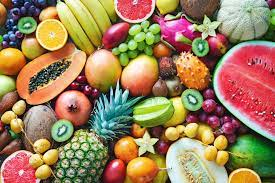
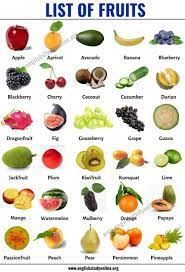
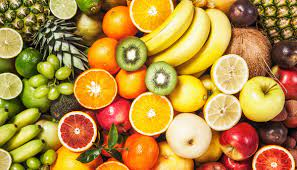
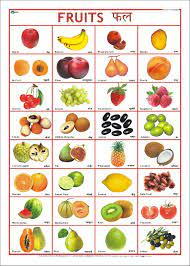

In [164]:
url=driver.find_elements_by_xpath("//img[@class='rg_i Q4LuWd']")
urls=[]
for i in url:
    link = i.get_attribute('src')
    urls.append(link)
urls[:4]

In [176]:
driver.get("https://www.google.com/")

In [177]:
try:
    search_designation=driver.find_element_by_xpath("/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input")
    search_designation.click()
except NoSuchElementException as e:
    print(e)

In [178]:
search_option=driver.find_element_by_xpath("/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input")
search_option.send_keys("guitar")

In [181]:
from selenium.common.exceptions import ElementClickInterceptedException
try:
    search_button=driver.find_element_by_xpath("/html/body/div[1]/div[3]/form/div[1]/div[1]/div[2]/div[2]/div[5]/center/input[1]")
    search_button.click()
except ElementClickInterceptedException as e:
    print(e)

In [182]:
images=driver.find_element_by_xpath("/html/body/div[7]/div/div[4]/div/div[1]/div/div[1]/div/div[3]/a")
images.click()

['',
 '',
 '',
 '']
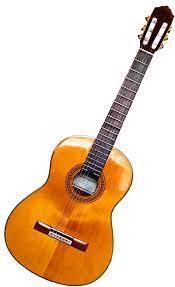
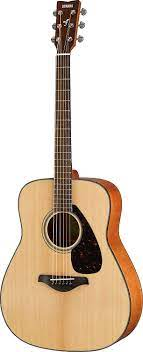
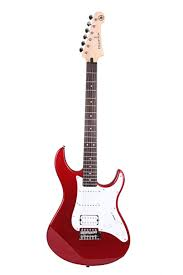
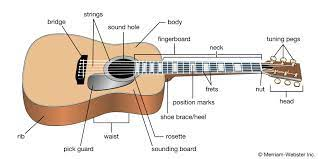

In [183]:
guitar=driver.find_elements_by_xpath("//img[@class='rg_i Q4LuWd']")
guitars=[]
for i in guitar:
    link = i.get_attribute('src')
    guitars.append(link)
guitars[:4]

In [184]:
driver.get("https://www.google.com/")

In [185]:
try:
    search_designation=driver.find_element_by_xpath("/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input")
    search_designation.click()
except NoSuchElementException as e:
    print(e)

In [186]:
search_option=driver.find_element_by_xpath("/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input")
search_option.send_keys("car")

In [187]:
try:
    search_button=driver.find_element_by_xpath("/html/body/div[1]/div[3]/form/div[1]/div[1]/div[2]/div[2]/div[5]/center/input[1]")
    search_button.click()
except ElementClickInterceptedException as e:
    print(e)

In [188]:
images=driver.find_element_by_xpath("/html/body/div[7]/div/div[4]/div/div[1]/div/div[1]/div/div[2]/a")
images.click()

['',
 '',
 '',
 '']
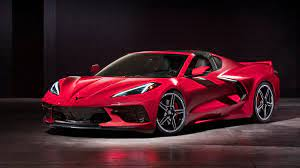
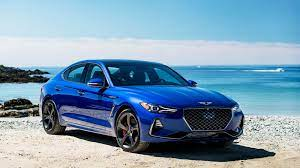
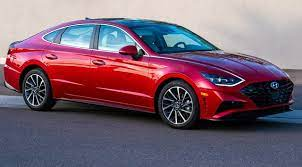
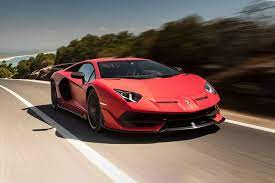

In [189]:
car=driver.find_elements_by_xpath("//img[@class='rg_i Q4LuWd']")
cars=[]
for i in car:
    link = i.get_attribute('src')
    cars.append(link)
cars[:4]

In [190]:
driver.get("https://www.google.com/")

In [191]:
try:
    search_designation=driver.find_element_by_xpath("/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input")
    search_designation.click()
except NoSuchElementException as e:
    print(e)

In [192]:
search_option=driver.find_element_by_xpath("/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input")
search_option.send_keys("Machine learning")

In [193]:
try:
    search_button=driver.find_element_by_xpath("/html/body/div[1]/div[3]/form/div[1]/div[1]/div[2]/div[2]/div[5]/center/input[1]")
    search_button.click()
except ElementClickInterceptedException as e:
    print(e)

In [194]:
images=driver.find_element_by_xpath("/html/body/div[7]/div/div[4]/div/div[1]/div/div[1]/div/div[3]/a")
images.click()

['',
 '',
 '',
 '']
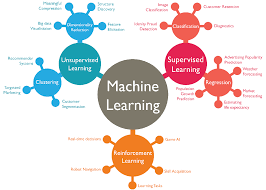
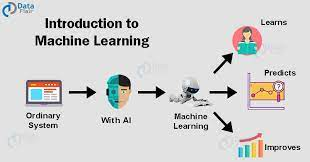
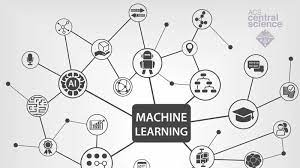
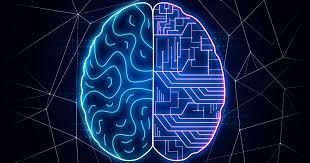

In [195]:
ml=driver.find_elements_by_xpath("//img[@class='rg_i Q4LuWd']")
machine_learning=[]
for i in ml:
    link = i.get_attribute('src')
    machine_learning.append(link)
machine_learning[:4]

In [196]:
driver.get("https://www.google.com/")

In [197]:
try:
    search_designation=driver.find_element_by_xpath("/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input")
    search_designation.click()
except NoSuchElementException as e:
    print(e)

In [198]:
search_option=driver.find_element_by_xpath("/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input")
search_option.send_keys("cakes")

In [199]:
try:
    search_button=driver.find_element_by_xpath("/html/body/div[1]/div[3]/form/div[1]/div[1]/div[2]/div[2]/div[5]/center/input[1]")
    search_button.click()
except ElementClickInterceptedException as e:
    print(e)

In [200]:
images=driver.find_element_by_xpath("/html/body/div[7]/div/div[4]/div/div[1]/div/div[1]/div/div[2]/a")
images.click()

['',
 '',
 '',
 '']
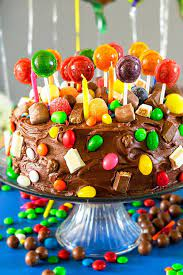
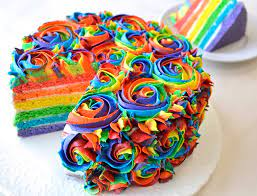
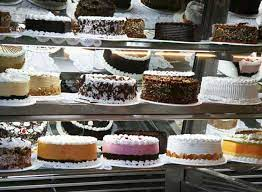
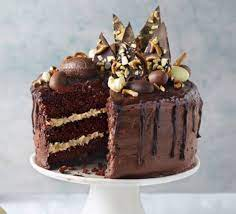

In [201]:
cake=driver.find_elements_by_xpath("//img[@class='rg_i Q4LuWd']")
cakes=[]
for i in cake:
    link = i.get_attribute('src')
    cakes.append(link)
cakes[:4]

In [203]:
len(urls),len(cars),len(cakes),len(machine_learning),len(guitars)

(48, 48, 48, 48, 48)

In [204]:
various_images = pd.DataFrame({})
various_images["fruits"] = urls
various_images["cars"]=cars
various_images["cakes"]= cakes
various_images["machine_learning"]=machine_learning
various_images["guitars"]=guitars
various_images.head(10)

,fruits,cars,cakes,machine_learning,guitars
0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
1,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
2,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
3,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
4,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
5,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
6,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
7,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
8,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
9,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."


4. Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on
www.flipkart.com and scrape following details for all the search results displayed on 1st page. Details to be 
scraped: “Brand Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”, 
“Secondary Camera”, “Display Size”, “Battery Capacity”, “Price”, “Product URL”. Incase if any of the 
details is missing then replace it by “- “. Save your results in a dataframe and CSV.


In [205]:
driver.get("http://www.flipkart.com/")

In [206]:
try:
    search_designation=driver.find_element_by_class_name("_3704LK")
    search_designation.click()
except ElementNotInteractableException as e:
    print(e)

In [207]:
search_option=driver.find_element_by_xpath("/html/body/div[1]/div/div[1]/div[1]/div[2]/div[2]/form/div/div/input")
search_option.send_keys("Oneplus Nord, pixel 4A")

In [209]:
search_button=driver.find_element_by_class_name("L0Z3Pu")
search_button.click()

In [210]:
name=driver.find_elements_by_xpath("//div[@class='_4rR01T']")
name[:2]

[<selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="dcba572e-2577-4edb-8750-74fd2127583e")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="649f4408-1558-424d-bed4-d32f80a2c31a")>]

In [211]:
product_name=[]
for i in name:
    title1=i.text
    product_name.append(title1)
product_name[0:4]

['OnePlus Nord 2 5G (Gray Sierra, 128 GB)',
 'OnePlus Nord 2 5G (Blue Haze, 256 GB)',
 'OnePlus Nord 2 5G (Blue Haze, 128 GB)',
 'OnePlus 9RT 5G (Nano Silver, 128 GB)']

In [212]:
price=driver.find_elements_by_xpath("//div[@class='_30jeq3 _1_WHN1']")
price[:2]

[<selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="16988b96-dbed-44bd-8947-a406b26ea82f")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="c474663e-cbdc-441e-be8c-417607bfceb4")>]

In [213]:
product_price=[]
for i in price:
    title1=i.text
    product_price.append(title1)
product_price[0:4]

['₹29,197', '₹34,987', '₹29,563', '₹40,999']

In [214]:
ram_rom=driver.find_elements_by_xpath("//li[@class='rgWa7D']")
ram_rom[:2]

[<selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="4a07b3aa-04cb-496b-ba11-ce7b901c6815")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="62773bc9-9846-4460-97e4-d94f946b4919")>]

In [218]:
ram_rom_size=[]
for i in ram_rom:
    title1=i.text
    ram_rom_size.append(title1)
ram_rom_size

['8 GB RAM | 128 GB ROM',
 '16.33 cm (6.43 inch) Display',
 '50MP Rear Camera',
 '4500 mAh Battery',
 '1 year Warranty',
 '12 GB RAM | 256 GB ROM',
 '16.33 cm (6.43 inch) Display',
 '50MP Rear Camera',
 '4500 mAh Battery',
 '1 year Warranty',
 '8 GB RAM | 128 GB ROM',
 '16.33 cm (6.43 inch) Display',
 '50MP Rear Camera',
 '4500 mAh Battery',
 '1 year Warranty',
 '8 GB RAM | 128 GB ROM',
 '16.81 cm (6.62 inch) Display',
 '50MP Rear Camera',
 '4500 mAh Battery',
 '12 months',
 '12 GB RAM | 256 GB ROM',
 '16.64 cm (6.55 inch) Display',
 '48MP Rear Camera',
 '4500 mAh Battery',
 '12 months',
 '12 GB RAM | 256 GB ROM',
 '16.81 cm (6.62 inch) Display',
 '50MP Rear Camera',
 '4500 mAh Battery',
 '12 months',
 '8 GB RAM | 128 GB ROM',
 '16.33 cm (6.43 inch) Display',
 '64MP Rear Camera',
 '4500 mAh Battery',
 '1 Year Warranty',
 '12 GB RAM | 256 GB ROM',
 '17.02 cm (6.7 inch) Display',
 '48MP Rear Camera',
 '4500 mAh Battery',
 '1 Year',
 '12 GB RAM | 256 GB ROM',
 '16.64 cm (6.55 inch) Displa

In [ ]:
ram_rom_size.

In [216]:
len(ram_rom_size),len(product_price),len(product_name)

(147, 24, 24)

In [217]:
147/24


6.125

In [221]:
l=[['8 GB RAM | 128 GB ROM',
 '16.33 cm (6.43 inch) Display',
 '50MP Rear Camera',
 '4500 mAh Battery',
 '1 year Warranty'],
 ['12 GB RAM | 256 GB ROM',
 '16.33 cm (6.43 inch) Display',
 '50MP Rear Camera',
 '4500 mAh Battery',
 '1 year Warranty'],
 ['8 GB RAM | 128 GB ROM',
 '16.33 cm (6.43 inch) Display',
 '50MP Rear Camera',
 '4500 mAh Battery',
 '1 year Warranty'],
 ['8 GB RAM | 128 GB ROM',
 '16.81 cm (6.62 inch) Display',
 '50MP Rear Camera',
 '4500 mAh Battery',
 '12 months'],
 ['12 GB RAM | 256 GB ROM',
 '16.64 cm (6.55 inch) Display',
 '48MP Rear Camera',
 '4500 mAh Battery',
 '12 months'],
 ['12 GB RAM | 256 GB ROM',
 '16.81 cm (6.62 inch) Display',
 '50MP Rear Camera',
 '4500 mAh Battery',
 '12 months'],
 ['8 GB RAM | 128 GB ROM',
 '16.33 cm (6.43 inch) Display',
 '64MP Rear Camera',
 '4500 mAh Battery',
 '1 Year Warranty'],
 ['12 GB RAM | 256 GB ROM',
 '17.02 cm (6.7 inch) Display',
 '48MP Rear Camera',
 '4500 mAh Battery',
 '1 Year'],
 ['12 GB RAM | 256 GB ROM',
 '16.64 cm (6.55 inch) Display',
 '48MP Rear Camera',
 '4500 mAh Battery',
 '12 months'],
 ['8 GB RAM | 128 GB ROM',
 '16.81 cm (6.62 inch) Display',
 '50MP Rear Camera',
 '4500 mAh Battery',
 '12 months'],
 ['12 GB RAM | 256 GB ROM',
 '16.64 cm (6.55 inch) Display',
 '48MP + 2MP + 16MP',
 '4300 mAh Battery',
 'Qualcomm Snapdragon 865 Processor',
 '1 year manufacturer warranty for device and 6 months manufacturer warranty for in-box accessories'],
 ['12 GB RAM | 256 GB ROM',
 '17.02 cm (6.7 inch) Display',
 '48MP Rear Camera',
 '4500 mAh Battery',
 '1 Year'],
 ['12 GB RAM | 256 GB ROM',
 '16.64 cm (6.55 inch) Display',
 '48MP Rear Camera',
 '4500 mAh Battery',
 '1 Year'],
 ['8 GB RAM | 128 GB ROM',
 '16.64 cm (6.55 inch) Display',
 '48MP Rear Camera',
 '4500 mAh Battery',
 '12 months'],
 ['8 GB RAM | 128 GB ROM',
 '16.64 cm (6.55 inch) Display',
 '48MP Rear Camera',
 '4500 mAh Battery',
 '12 months'],
 ['12 GB RAM | 256 GB ROM',
 '16.81 cm (6.62 inch) Display',
 '48MP Rear Camera',
 '4500 mAh Battery',
 '12 months'],
 ['8 GB RAM | 128 GB ROM',
 '16.64 cm (6.55 inch) Display',
 '48MP Rear Camera',
 '4500 mAh Battery',
 '12 months'],
 ['8 GB RAM | 128 GB ROM',
 '17.02 cm (6.7 inch) Display',
 '48MP Rear Camera',
 '4500 mAh Battery',
 '1 Year'],
 ['32 MB RAM | 64 MB ROM',
 '3.66 cm (1.44 inch) Display',
 '0.2MP Rear Camera',
 '400 mAh Battery',
 '0 0 0 0MHz Processor',
 '1 year brand Service Center Warranty'],
 ['4 GB RAM | 32 GB ROM | Expandable Upto 256 GB',
 '13.97 cm (5.5 inch) Full HD Display',
 '23MP Rear Camera | 8MP Front Camera',
 '3430 mAh Battery',
 'Helio P20 Octa Core 64bit Processor',
 '1 Year Manufacturer Warranty'],
 ['3 GB RAM | 32 GB ROM',
 '16.51 cm (6.5 inch) HD+ Display',
 '8MP + 2MP | 5MP Front Camera',
 '4950 mAh Li-ion Battery',
 'Unisoc SC9863A Processor',
 '1 year replacement guarantee',
 'Jio Exclusive up to 10% price support. Jio customers can also get additional benefits worth ?4000',
 'V-notch screen',
 'LED flash',
 'expandable up to 128GB',
 'up to 2-days battery life with a 5000 mAh battery',
 'Android 11 Go Edition with 2 years of quarterly security updates',
 '1 Year Manufacturer Warranty For Device and Battery and 6 Months Manufacturer Warranty for In-box Accessories From the Date of Purchase'],
 ['2 GB RAM | 32 GB ROM',
 '16.51 cm (6.5 inch) HD+ Display',
 '8MP + 2MP | 5MP Front Camera',
 '5000 mAh Li-ion Battery',
 'Unisoc SC9863A Processor',
 '1 year replacement guarantee',
 'Jio Exclusive up to 10% price support. Jio customers can also get additional benefits worth ?4000',
 'V-notch screen',
 'LED flash',
 'expandable up to 128GB',
 'up to 2-days battery life with a 5000 mAh battery',
 'Android 11 Go Edition with 2 years of quarterly security updates',
 '1 Year Manufacturer Warranty For Device and Battery and 6 Months Manufacturer Warranty for In-box Accessories From the Date of Purchase'],
 ['32 MB RAM | 32 MB ROM',
 '6.1 cm (2.4 inch) Display',
 '1.3MP Rear Camera',
 '2700 mAh Battery',
 '1 Year'],
 ['2 GB RAM | 32 GB ROM',
 '16.51 cm (6.5 inch) HD+ Display',
 '8MP + 2MP | 5MP Front Camera',
 '5000 mAh Li-ion Battery',
 'Unisoc SC9863A Processor',
 '1 year replacement guarantee',
 'Jio Exclusive up to 10% price support. Jio customers can also get additional benefits worth ?4000',
 'V-notch screen',
 'LED flash',
 'expandable up to 128GB',
 'up to 2-days battery life with a 5000 mAh battery',
 'Android 11 Go Edition with 2 years of quarterly security updates',
 '1 Year Manufacturer Warranty For Device and Battery and 6 Months Manufacturer Warranty for In-box Accessories From the Date of Purchase']]

In [222]:
len(l)

24

In [223]:
phone_details = pd.DataFrame({})
phone_details["product name and color"] = product_name
phone_details["price"]=product_price
phone_details["ram / rom / camera / processor / battery"]= l
phone_details

,product name and color,price,ram / rom / camera / processor / battery
0,"OnePlus Nord 2 5G (Gray Sierra, 128 GB)","₹29,197","[8 GB RAM | 128 GB ROM, 16.33 cm (6.43 inch) D..."
1,"OnePlus Nord 2 5G (Blue Haze, 256 GB)","₹34,987","[12 GB RAM | 256 GB ROM, 16.33 cm (6.43 inch) ..."
2,"OnePlus Nord 2 5G (Blue Haze, 128 GB)","₹29,563","[8 GB RAM | 128 GB ROM, 16.33 cm (6.43 inch) D..."
3,"OnePlus 9RT 5G (Nano Silver, 128 GB)","₹40,999","[8 GB RAM | 128 GB ROM, 16.81 cm (6.62 inch) D..."
4,"OnePlus 9R 5G (Carbon Black, 256 GB)","₹42,490","[12 GB RAM | 256 GB ROM, 16.64 cm (6.55 inch) ..."
5,"OnePlus 9RT 5G (Hacker Black, 256 GB)","₹44,299","[12 GB RAM | 256 GB ROM, 16.81 cm (6.62 inch) ..."
6,"OnePlus Nord CE 2 5G (Bahama Blue, 128 GB)","₹24,998","[8 GB RAM | 128 GB ROM, 16.33 cm (6.43 inch) D..."
7,"OnePlus 9 Pro 5G (Pine Green, 256 GB)","₹53,161","[12 GB RAM | 256 GB ROM, 17.02 cm (6.7 inch) D..."
8,"OnePlus 9 5G (Arctic Sky, 256 GB)","₹44,300","[12 GB RAM | 256 GB ROM, 16.64 cm (6.55 inch) ..."
9,"OnePlus 9RT 5G (Hacker Black, 128 GB)","₹40,800","[8 GB RAM | 128 GB ROM, 16.81 cm (6.62 inch) D..."


5. Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on google
maps.


In [231]:
driver.get("https://www.google.com/")

In [232]:
try:
    search_designation=driver.find_element_by_xpath("/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input")
    search_designation.click()
except NoSuchElementException as e:
    print(e)

In [233]:
search_option=driver.find_element_by_xpath("/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input")
search_option.send_keys("murshidabad google map")

In [234]:
try:
    search_button=driver.find_element_by_xpath("/html/body/div[1]/div[3]/form/div[1]/div[1]/div[2]/div[2]/div[5]/center/input[1]")
    search_button.click()
except ElementClickInterceptedException as e:
    print(e)

In [235]:
maps=driver.find_element_by_xpath("/html/body/div[7]/div/div[4]/div/div[1]/div/div[1]/div/div[2]/a")
maps.click()

In [236]:
right=driver.find_element_by_xpath("/html/body/div[3]/div[3]/div[1]/ul/li[4]")
right.click()

In [239]:
location=driver.find_elements_by_xpath("//button[@class='ZqLNQd t9f27']")
location

[<selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="4dfce219-efd5-4d30-a3e8-183f54d8b1f8")>]

In [241]:
latitude_longitude=[]
for i in location:
    title1=i.text
    latitude_longitude.append(title1)
latitude_longitude

['24.174783, 88.280382']

6. Write a program to scrap details of all the funding deals for second quarter (i.e Jan 21 – March 21) 
from trak.in.

In [242]:
 driver.get("https://www.google.com/")

In [243]:
try:
    search_designation=driver.find_element_by_xpath("/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input")
    search_designation.click()
except NoSuchElementException as e:
    print(e)

In [244]:
search_option=driver.find_element_by_xpath("/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input")
search_option.send_keys("trak.in")

In [245]:
try:
    search_button=driver.find_element_by_xpath("/html/body/div[1]/div[3]/form/div[1]/div[1]/div[2]/div[2]/div[5]/center/input[1]")
    search_button.click()
except ElementClickInterceptedException as e:
    print(e)

In [246]:
trak=driver.find_element_by_xpath("/html/body/div[7]/div/div[10]/div/div[2]/div[2]/div/div/div[1]/div/div/div/div/div/div/div[1]/a/h3")
trak.click()

In [247]:
more=driver.find_element_by_xpath("/html/body/div[1]/header/div[2]/div/div/div/div/nav/ul/li[9]/a")
more.click()

In [250]:
fund=driver.find_element_by_xpath("/html/body/div[1]/header/div[2]/div/div/div/div/nav/ul/li[9]")
fund.click()

In [259]:
from selenium.common.exceptions import InvalidSelectorException
try:
    search_designation=driver.find_element_by_xpath("/html/body/div[1]/header/div[2]/div/div/div/div/nav/ul/li[9]/ul")
    search_designation.click()
except ElementNotInteractableException as e:
    print(e)
    search_designation=driver.find_element_by_class_name("sub-menu bs-pretty-tabs-elements")
    search_designation.click()

Message: element not interactable
  (Session info: chrome=101.0.4951.67)
Stacktrace:
Backtrace:
	Ordinal0 [0x01247413+2389011]
	Ordinal0 [0x011D9F61+1941345]
	Ordinal0 [0x010CC520+836896]
	Ordinal0 [0x010FA1F3+1024499]
	Ordinal0 [0x010EFF93+982931]
	Ordinal0 [0x0111414C+1130828]
	Ordinal0 [0x010EF974+981364]
	Ordinal0 [0x01114364+1131364]
	Ordinal0 [0x01124302+1196802]
	Ordinal0 [0x01113F66+1130342]
	Ordinal0 [0x010EE546+976198]
	Ordinal0 [0x010EF456+980054]
	GetHandleVerifier [0x013F9632+1727522]
	GetHandleVerifier [0x014ABA4D+2457661]
	GetHandleVerifier [0x012DEB81+569713]
	GetHandleVerifier [0x012DDD76+566118]
	Ordinal0 [0x011E0B2B+1968939]
	Ordinal0 [0x011E5988+1989000]
	Ordinal0 [0x011E5A75+1989237]
	Ordinal0 [0x011EECB1+2026673]
	BaseThreadInitThunk [0x77396739+25]
	RtlGetFullPathName_UEx [0x77968FEF+1215]
	RtlGetFullPathName_UEx [0x77968FBD+1165]



NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":".sub-menu bs-pretty-tabs-elements"}
  (Session info: chrome=101.0.4951.67)
Stacktrace:
Backtrace:
	Ordinal0 [0x01247413+2389011]
	Ordinal0 [0x011D9F61+1941345]
	Ordinal0 [0x010CC658+837208]
	Ordinal0 [0x010F91DD+1020381]
	Ordinal0 [0x010F949B+1021083]
	Ordinal0 [0x01126032+1204274]
	Ordinal0 [0x01114194+1130900]
	Ordinal0 [0x01124302+1196802]
	Ordinal0 [0x01113F66+1130342]
	Ordinal0 [0x010EE546+976198]
	Ordinal0 [0x010EF456+980054]
	GetHandleVerifier [0x013F9632+1727522]
	GetHandleVerifier [0x014ABA4D+2457661]
	GetHandleVerifier [0x012DEB81+569713]
	GetHandleVerifier [0x012DDD76+566118]
	Ordinal0 [0x011E0B2B+1968939]
	Ordinal0 [0x011E5988+1989000]
	Ordinal0 [0x011E5A75+1989237]
	Ordinal0 [0x011EECB1+2026673]
	BaseThreadInitThunk [0x77396739+25]
	RtlGetFullPathName_UEx [0x77968FEF+1215]
	RtlGetFullPathName_UEx [0x77968FBD+1165]


In [265]:
jandate=driver.find_elements_by_xpath("//td[@class='column-2']")
jandate[0:2]

[<selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="998e4f1b-ee6d-472f-a39b-fd445c83e77a")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="05bb08a8-8634-4802-a7e6-b697117fba90")>]

In [268]:
january_date=[]
for i in jandate:
    title1=i.text
    january_date.append(title1)
january_date[0:2]

['01/04/2021', '05/04/2021']

In [286]:
janname=driver.find_elements_by_xpath("//td[@class='column-3']")
janname[0:2]

[<selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="f9624628-22c2-4c59-836d-91e51d2b5d1f")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="7d9d8a1e-4624-48c5-a5e2-a445da141213")>]

In [292]:
january_name=[]
for i in janname:
    title1=i.text
    january_name.append(title1)
january_name[5:29]

['DealShare',
 'Uniphore',
 'Dunzo',
 'BYJU’S',
 'SkilloVilla',
 'CityMall',
 'DotPe',
 'Doubtnut',
 'Zomato',
 'Fingerlix',
 'Zolve',
 'KreditBee',
 'Pepperfry',
 'Grofers',
 'Nothing',
 'SplashLearn',
 'Digit Insurance',
 'Bombay Shaving Company',
 'DeHaat',
 'Darwinbox',
 'mfine',
 'Udayy',
 'True Elements',
 'Saveo']

In [271]:
ind=driver.find_elements_by_xpath("//td[@class='column-4']")
ind[0:2]

[<selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="87d610c3-bc33-4183-8268-1fc4f8086273")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="c6a7cf12-27c1-4095-abb5-54a88e91b5cc")>]

In [272]:
industry=[]
for i in ind:
    title1=i.text
    industry.append(title1)
industry[0:2]

['Edu-tech', 'E-commerce']

In [273]:
subver=driver.find_elements_by_xpath("//td[@class='column-5']")
subver[0:2]

[<selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="f8af8819-9481-48a5-8094-d6c1bf96c950")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="0f008b73-6594-4425-b6c7-f1238b88208e")>]

In [274]:
subvirtical=[]
for i in subver:
    title1=i.text
    subvirtical.append(title1)
subvirtical[0:2]

['Online tutoring', 'Online reselling platform']

In [275]:
loca=driver.find_elements_by_xpath("//td[@class='column-6']")
loca[0:2]

[<selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="65548417-1ccb-48a7-9dd7-3e8b4187afd4")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="b71b4150-1e94-4615-9abf-1aae6b5d9de1")>]

In [276]:
location=[]
for i in loca:
    title1=i.text
    location.append(title1)
location[0:2]

['Bengaluru', 'Bengaluru']

In [277]:
inves=driver.find_elements_by_xpath("//td[@class='column-7']")
inves[0:2]

[<selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="b4ba8e17-eed5-4549-a8c3-be9057cf79c6")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="e1637b3b-eebc-4bc9-9578-cc935c6464f4")>]

In [278]:
investor=[]
for i in inves:
    title1=i.text
    investor.append(title1)
investor[0:2]

['Innoven Capital', 'SoftBank Vision Fund 2']

In [279]:
invest=driver.find_elements_by_xpath("//td[@class='column-8']")
invest[0:2]

[<selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="76e0f63e-7a40-448e-a80f-c20e5a615f5c")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="fa7c86fc-2dc3-4ca1-897a-ba84fccfe3c4")>]

In [280]:
investment=[]
for i in invest:
    title1=i.text
    investment.append(title1)
investment[0:2]

['Series F', 'Series E']

In [281]:
amm=driver.find_elements_by_xpath("//td[@class='column-9']")
amm[0:2]

[<selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="b1a60de6-c6a8-4ad3-b35a-34f4efebb07b")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="9a7c7104-4447-4f2a-9fe6-058521bb50cd")>]

In [282]:
ammount=[]
for i in amm:
    title1=i.text
    ammount.append(title1)
ammount[0:2]

['460,000,000', '300,000,000']

In [283]:
len(january_date),len(january_name),len(industry),len(subvirtical),len(location),len(investor),len(investment),len(ammount)

(392, 392, 392, 392, 392, 392, 392, 392)

In [293]:
funding_deals = pd.DataFrame({})
funding_deals["date"] = january_date[5:29]
funding_deals["company name"]=january_name[5:29]
funding_deals["industry"]= industry[5:29]
funding_deals["subvirtical"]=subvirtical[5:29]
funding_deals["location"]=location[5:29]
funding_deals["investor"] = investor[5:29]
funding_deals["investment"]=investment[5:29]
funding_deals["ammount"]= ammount[5:29]
funding_deals

,date,company name,industry,subvirtical,location,investor,investment,ammount
0,04/03/2021,DealShare,E-commerce,Online shopping platform,"Jaipur, Rajasthan",Innoven Capital,Debt Financing,"250,000,000"
1,31/03/2021,Uniphore,Technology,Conversational Service Automation (CSA),Palo Alto,Sorenson Capital Partners,Series D,"140,000,000"
2,30/03/2021,Dunzo,E-commerce,Hyper-local delivery app,Bengaluru,Krishtal Advisors Pte Ltd,Series E,"8,000,000"
3,30/03/2021,BYJU’S,Edu-tech,Online tutoring,Bengaluru,"MC Global Edtech, B Capital, Baron, others",Series F,"460,000,000"
4,23/03/2021,SkilloVilla,Edu-tech,Career and job-oriented upskilling.,Bengaluru,"Titan Capital, others",Seed,"300,000,000"
5,25/03/2021,CityMall,E-commerce,Social ecommerce and online grocery platform,Gurgaon,Accel Partners,Series A,"11,000,000"
6,26/03/2021,DotPe,FinTech,Commerce and payments platform to offline ente...,Gurgaon,PayU,Series A,"27,500,000"
7,11/02/2021,Doubtnut,Edu Tech,E-Learning Platform,Gurgaon,"SIG Global, Sequoia Capital, WaterBridge Ventu...",Series B,"2,500,000"
8,22/02/2021,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,"Tiger Global, Kora",Venture,"250,000,000"
9,19/02/2021,Fingerlix,Hospitality,Semi-cooked food delivery app,Mumbai,"Rhodium Trust, Accel Partners and Swiggy",Series C,"2,747,045.20"


7. Write a program to scrap all the available details of best gaming laptops from digit.in.


In [294]:
driver.get("https://www.google.com/")

In [295]:
try:
    search_designation=driver.find_element_by_xpath("/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input")
    search_designation.click()
except NoSuchElementException as e:
    print(e)

In [296]:
search_option=driver.find_element_by_xpath("/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input")
search_option.send_keys("digit.in")

In [297]:
try:
    search_button=driver.find_element_by_xpath("/html/body/div[1]/div[3]/form/div[1]/div[1]/div[2]/div[2]/div[5]/center/input[1]")
    search_button.click()
except ElementClickInterceptedException as e:
    print(e)

In [298]:
digit=driver.find_element_by_xpath("/html/body/div[7]/div/div[10]/div/div[2]/div[2]/div/div/div[1]/div/div/div/div/div/div[1]/a/h3")
digit.click()

In [299]:
lapee=driver.find_element_by_xpath("/html/body/div[3]/div/div[2]/div[2]/div[4]/ul/li[9]/a")
lapee.click()

In [301]:
amm=driver.find_elements_by_xpath("//td[@class='smmerchant']")
amm[0:2]

[<selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="b7f7a556-2ca2-48b8-a3b2-e6853345da26")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="4caf3477-4d87-4249-8f8d-2fa319dc66ab")>]

In [305]:
amm=driver.find_elements_by_xpath("//*[@id='summtable']/tbody/tr[1]/td[1]")
amm[0:2]

[<selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="feeab138-ea55-407b-84f8-0c14ce791b60")>]

In [306]:
ammount=[]
for i in amm:
    title1=i.text
    ammount.append(title1)
ammount

['MSI Raider GE76']

In [317]:
lapee=driver.find_elements_by_xpath("//div[@class='TopNumbeHeading sticky-footer']")
lapee[0:2]

[<selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="f8d1cabc-d26c-44b7-af85-3b0178ec9df4")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="1bc041f7-11f1-4532-be50-fb310306611c")>]

In [326]:
laptop_name=[]
for i in lapee:
    title1=i.text
    laptop_name.append(title1.replace("\n",""))
laptop_name

['1.MSI RAIDER GE76',
 '2.ASUS ROG STRIX SCAR 15',
 '4.MSI STEALTH 15M',
 '5.ASUS ROG STRIX SCAR 15',
 '6.ASUS ROG STRIX SCAR 15',
 '7.ASUS ZEPHYRUS G14',
 '8.HP OMEN 16',
 '9.ASUS ROG ZEPHYRUS DUO 15',
 '10.ACER ASPIRE 7 GAMING LAPTOP']

In [329]:
laptop_name.insert(2,'3.Acer Nitro 5')

In [319]:
window=driver.find_elements_by_xpath("//div[@class='value']")
window[0:2]

[<selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="0f290157-a380-4a20-ac0a-5f3b60e1bbfe")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="e2a9056f-0e9e-4414-b535-c1786d7d7250")>]

In [321]:
windows=[]
for i in window:
    title1=i.text
    windows.append(title1.replace("NA",""))
windows

['WINDOWS 11 HOME',
 '17" (3840 X 2160)',
 '12TH GEN INTEL CORE I9-12900HK | 5 GHZ',
 '2 TB SSD/16 GBGB DDR5',
 'WINDOWS 11 HOME',
 '15.6" (2560 X 1440)',
 '12TH GEN INTEL CORE I9-12900H | 2.5 GHZ',
 '2 TB SSD/32 GBGB DDR5',
 'WINDOWS 10',
 '15.6" (1920 X 1080)',
 'AMD RYZEN 9 OCTA CORE | 2.4 GHZ',
 '1 TB HDD/16 GBGB DDR4',
 'WINDOWS 10',
 '15.6" (1920 X 1080)',
 'INTEL CORE I7 11TH GEN - 11375H | ',
 '1 TB SSD/16 GBGB DDR4',
 'WINDOWS 10',
 '15.6" (2560 X 1440)',
 'AMD RYZEN 9 OCTA CORE - 5900HX | 3.3 GHZ',
 '2 TB SSD/32 GBGB DDR4',
 'WINDOWS 10 HOME',
 '15.6" (1920 X 1080)',
 'AMD RYZEN™ 9 5900HX | 3.3 GHZ',
 '1 TB SSD/16 GBGB DDR4',
 'WINDOWS 10 HOME',
 '14" (1920 X 1080)',
 'AMD 3RD GEN RYZEN 9 | 3.3 GHZ',
 '1 TB SSD/16 GBGB DDR4',
 'WINDOWS 11 HOME',
 '16.1" (1920 X 1080)',
 '12TH GEN INTEL CORE I7-12700H | 4.7 GHZ',
 '1 TB SSD/16 GBGB DDR4',
 'WINDOWS 10',
 '15.6" (3840 X 1100)',
 'INTEL CORE I7 10TH GEN 10875H | ',
 '512 GB SSD/4 GBGB DDR4',
 'WINDOWS 10 HOME',
 '15.6" (1920 X 1

In [322]:
l=[['WINDOWS 11 HOME',
 '17" (3840 X 2160)',
 '12TH GEN INTEL CORE I9-12900HK | 5 GHZ',
 '2 TB SSD/16 GBGB DDR5'],
 ['WINDOWS 11 HOME',
 '15.6" (2560 X 1440)',
 '12TH GEN INTEL CORE I9-12900H | 2.5 GHZ',
 '2 TB SSD/32 GBGB DDR5'],
 ['WINDOWS 10',
 '15.6" (1920 X 1080)',
 'AMD RYZEN 9 OCTA CORE | 2.4 GHZ',
 '1 TB HDD/16 GBGB DDR4'],
 ['WINDOWS 10',
 '15.6" (1920 X 1080)',
 'INTEL CORE I7 11TH GEN - 11375H | ',
 '1 TB SSD/16 GBGB DDR4'],
 ['WINDOWS 10',
 '15.6" (2560 X 1440)',
 'AMD RYZEN 9 OCTA CORE - 5900HX | 3.3 GHZ',
 '2 TB SSD/32 GBGB DDR4'],
 ['WINDOWS 10 HOME',
 '15.6" (1920 X 1080)',
 'AMD RYZEN™ 9 5900HX | 3.3 GHZ',
 '1 TB SSD/16 GBGB DDR4'],
 ['WINDOWS 10 HOME',
 '14" (1920 X 1080)',
 'AMD 3RD GEN RYZEN 9 | 3.3 GHZ',
 '1 TB SSD/16 GBGB DDR4'],
 ['WINDOWS 11 HOME',
 '16.1" (1920 X 1080)',
 '12TH GEN INTEL CORE I7-12700H | 4.7 GHZ',
 '1 TB SSD/16 GBGB DDR4'],
 ['WINDOWS 10',
 '15.6" (3840 X 1100)',
 'INTEL CORE I7 10TH GEN 10875H | ',
 '512 GB SSD/4 GBGB DDR4'],
 ['WINDOWS 10 HOME',
 '15.6" (1920 X 1080)',
 'AMD RYZEN™ 5-5500U HEXA-CORE | ',
 '512 GB SSD/8 GBGB DDR4']]

In [323]:
len(l)

10

In [331]:
gaming_laptop = pd.DataFrame({})
gaming_laptop["name"] = laptop_name
gaming_laptop["detail"]=l
gaming_laptop

,name,detail
0,1.MSI RAIDER GE76,"[WINDOWS 11 HOME, 17"" (3840 X 2160), 12TH GEN ..."
1,2.ASUS ROG STRIX SCAR 15,"[WINDOWS 11 HOME, 15.6"" (2560 X 1440), 12TH GE..."
2,3.Acer Nitro 5,"[WINDOWS 10, 15.6"" (1920 X 1080), AMD RYZEN 9 ..."
3,4.MSI STEALTH 15M,"[WINDOWS 10, 15.6"" (1920 X 1080), INTEL CORE I..."
4,5.ASUS ROG STRIX SCAR 15,"[WINDOWS 10, 15.6"" (2560 X 1440), AMD RYZEN 9 ..."
5,6.ASUS ROG STRIX SCAR 15,"[WINDOWS 10 HOME, 15.6"" (1920 X 1080), AMD RYZ..."
6,7.ASUS ZEPHYRUS G14,"[WINDOWS 10 HOME, 14"" (1920 X 1080), AMD 3RD G..."
7,8.HP OMEN 16,"[WINDOWS 11 HOME, 16.1"" (1920 X 1080), 12TH GE..."
8,9.ASUS ROG ZEPHYRUS DUO 15,"[WINDOWS 10, 15.6"" (3840 X 1100), INTEL CORE I..."
9,10.ACER ASPIRE 7 GAMING LAPTOP,"[WINDOWS 10 HOME, 15.6"" (1920 X 1080), AMD RYZ..."


8. Write a python program to scrape the details for all billionaires from www.forbes.com. Details to be 
scrapped: “Rank”, “Name”, “Net worth”, “Age”, “Citizenship”, “Source”, “Industry”.


In [332]:
driver.get("http://www.forbes.com/")

In [333]:
try:
    search_designation=driver.find_element_by_xpath("/html/body/div[1]/header/nav/div[1]/button[1]")
    search_designation.click()
except NoSuchElementException as e:
    print(e)

In [341]:
try:
    billionaire=driver.find_element_by_xpath("/html/body/div[1]/header/nav/div[3]/ul/li[1]")
    billionaire.click()
except ElementNotInteractableException as e:
    print(e)

In [347]:
try:
    lapee=driver.find_element_by_class_name("header__section header__section--all")
    lapee.click()
except NoSuchElementException as e:
    print(e)

Message: no such element: Unable to locate element: {"method":"css selector","selector":".header__section header__section--all"}
  (Session info: chrome=101.0.4951.67)
Stacktrace:
Backtrace:
	Ordinal0 [0x01247413+2389011]
	Ordinal0 [0x011D9F61+1941345]
	Ordinal0 [0x010CC658+837208]
	Ordinal0 [0x010F91DD+1020381]
	Ordinal0 [0x010F949B+1021083]
	Ordinal0 [0x01126032+1204274]
	Ordinal0 [0x01114194+1130900]
	Ordinal0 [0x01124302+1196802]
	Ordinal0 [0x01113F66+1130342]
	Ordinal0 [0x010EE546+976198]
	Ordinal0 [0x010EF456+980054]
	GetHandleVerifier [0x013F9632+1727522]
	GetHandleVerifier [0x014ABA4D+2457661]
	GetHandleVerifier [0x012DEB81+569713]
	GetHandleVerifier [0x012DDD76+566118]
	Ordinal0 [0x011E0B2B+1968939]
	Ordinal0 [0x011E5988+1989000]
	Ordinal0 [0x011E5A75+1989237]
	Ordinal0 [0x011EECB1+2026673]
	BaseThreadInitThunk [0x77396739+25]
	RtlGetFullPathName_UEx [0x77968FEF+1215]
	RtlGetFullPathName_UEx [0x77968FBD+1165]



In [348]:
search_button=driver.find_element_by_xpath("/html/body/div[1]/main/div/section/div/div/div[2]/div[1]/a[2]")
search_button.click()

In [349]:
bill=driver.find_elements_by_xpath("//div[@class='personName']")
bill[0:2]

[<selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="874780a3-49fd-4511-843d-c93da3657b70")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="fa5fd7d3-109f-462f-8317-fbc065b526d9")>]

In [363]:
names=[]
for i in bill:
    title1=i.text
    names.append(title1)
names[0:2]

['Elon Musk', 'Jeff Bezos']

In [351]:
worth=driver.find_elements_by_xpath("//div[@class='netWorth']")
worth[0:2]

[<selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="ee366b01-7421-4117-8b99-1e177bdd24ee")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="6b68ce8c-9ffe-429d-a5c0-6164702dae4f")>]

In [362]:
networth=[]
for i in worth:
    title1=i.text
    networth.append(title1)
networth[0:2]

['$219 B', '$171 B']

In [353]:
coun=driver.find_elements_by_xpath("//div[@class='countryOfCitizenship']")
coun[0:2]

[<selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="82fb5375-3122-4b6d-a23a-b478624994e2")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="6a59f9fc-ec55-493d-a758-38c21c25c44c")>]

In [361]:
country=[]
for i in coun:
    title1=i.text
    country.append(title1)
country[0:2]

['United States', 'United States']

In [355]:
sour=driver.find_elements_by_xpath("//div[@class='source']")
sour[0:2]

[<selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="f313ce01-97bf-4eb5-9ea1-02e6c2e335a7")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="a1fc1885-be49-45bb-a67f-2429c52f8c79")>]

In [359]:
source=[]
for i in sour:
    title1=i.text
    source.append(title1)
source[0:2]

['Tesla, SpaceX', 'Amazon']

In [357]:
ind=driver.find_elements_by_xpath("//div[@class='category']")
ind[0:2]

[<selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="1ff7e103-0abd-44fa-b8a2-149fd8dbc7c5")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="561e5f43-c4e4-4005-b031-a217c17847b4")>]

In [360]:
industry=[]
for i in ind:
    title1=i.text
    industry.append(title1)
industry[0:2]

['Automotive', 'Technology']

In [364]:
len(names),len(networth),len(country),len(source),len(industry)

(200, 200, 200, 200, 200)

In [365]:
billonaire_details = pd.DataFrame({})
billonaire_details["name"] = names
billonaire_details["networth"]=networth
billonaire_details["country"] = country
billonaire_details["source"]=source
billonaire_details["industry"] = industry
billonaire_details

,name,networth,country,source,industry
0,Elon Musk,$219 B,United States,"Tesla, SpaceX",Automotive
1,Jeff Bezos,$171 B,United States,Amazon,Technology
2,Bernard Arnault & family,$158 B,France,LVMH,Fashion & Retail
3,Bill Gates,$129 B,United States,Microsoft,Technology
4,Warren Buffett,$118 B,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...
195,Marcel Herrmann Telles,$10.3 B,Brazil,beer,Food & Beverage
196,Leon Black,$10 B,United States,private equity,Finance & Investments
197,Joe Gebbia,$10 B,United States,Airbnb,Technology
198,David Geffen,$10 B,United States,"movies, record labels",Media & Entertainment


9. Write a program to extract at least 500 Comments, Comment upvote and time when comment was posted 
from any YouTube Video.

In [379]:
driver.get("https://www.youtube.com/")

In [380]:
search_button=driver.find_element_by_xpath("/html/body/ytd-app/div[1]/ytd-page-manager/ytd-browse/ytd-two-column-browse-results-renderer/div[1]/ytd-rich-grid-renderer/div[6]/ytd-rich-grid-row[1]/div/ytd-rich-item-renderer[1]/div/ytd-rich-grid-media/div[1]/div[2]/div[1]/h3/a/yt-formatted-string")
search_button.click()

In [381]:
p=driver.find_element_by_xpath("/html/body/ytd-app/div[1]/ytd-page-manager/ytd-watch-flexy/div[5]/div[1]/div/div[1]/div/div/div/ytd-player/div/div/div[33]/div[2]/div[1]/button")
p.click()

In [445]:
com=driver.find_elements_by_xpath("//div[@class='style-scope ytd-expander']")
com[0:2]

[<selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="e40fdadb-7f9d-4e3f-8942-cfb2f05a5a79")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="89a4075a-d4fa-45ae-a27c-fe93222e7212")>]

In [446]:
comment1=[]
for i in com:
    title1=i.text
    comment.append(title1.replace("\n","."))
comment[0:2]

['',
 'Neither can I deny the fact that music has been copied nor can I underappreciate the lyrics which makes the song meaningful and melodious voice of the singer']

In [447]:
len(comment)

506

In [448]:
tm=driver.find_elements_by_xpath("//a[@class='yt-simple-endpoint style-scope yt-formatted-string']")
tm[0:2]

[<selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="a80b0315-af42-435f-8585-ba1f2c0522ee")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="e8ab72b8-84d6-438f-920b-bcc8a284bd8f")>]

In [451]:
time=[]
for i in tm:
    title1=i.text
    time.append(title1)
time

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'https://bit.ly/2yPcBkS',
 '',
 '',
 'Zee Music Company',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '1 month ago',
 'Teasingsex.Uno',
 '1 month ago',
 '1 year ago',
 '10 months ago',
 '4 months ago',
 '4 months ago',
 '1 year ago (edited)',
 '#Laxmii',
 '1 year ago',
 '1 year ago',
 '7 months ago (edited)',
 '1 year ago',
 '1 month ago',
 '1 year ago',
 '5 months ago',
 '1 year ago',
 '7 months ago',
 '1 year ago',
 '5 months ago',
 '1:46',
 '4 months ago',
 '11 months ago',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']

In [452]:
tm=driver.find_elements_by_xpath("//span[@class='style-scope ytd-comment-action-buttons-renderer']")
tm[0:2]

[<selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="c11370be-52a4-47b4-a2c6-3918ca0de095")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="4239b064-1cd0-4ba4-9c9e-ab0435aca5ee")>]

In [454]:
uplikes=[]
for i in tm:
    title1=i.text
    uplikes.append(title1)
uplikes[0:4]

['', '7', '', '7']

10. Write a python program to scrape a data for all available Hostels from https://www.hostelworld.com/ in 
“London” location. You have to scrape hostel name, distance from city centre, ratings, total reviews, 
overall reviews, privates from price, dorms from price, facilities and property description

In [455]:
driver.get("https://www.hostelworld.com/")

In [456]:
search_button=driver.find_element_by_xpath("/html/body/div[3]/div/div/div[1]/div[1]/div/div[2]/div[1]/header/div/button")
search_button.click()

In [457]:
hostel_button=driver.find_element_by_xpath("/html/body/div[3]/div/div/div[1]/div[1]/div/div[2]/div[1]/header/div[2]/div/div[2]/ul[2]/li[2]/a")
hostel_button.click()

In [458]:
search_option=driver.find_element_by_xpath("/html/body/div[1]/div[1]/div[2]/section/div/form/div/div[1]/div/input")
search_option.send_keys("London")

In [459]:
london=driver.find_element_by_xpath("/html/body/div[1]/div[1]/div[2]/section/div/form/div/div[1]/div[2]/ul/li[2]")
london.click()

In [460]:
search=driver.find_element_by_xpath("/html/body/div[1]/div[1]/div[2]/section/div/form/div/div[2]/button")
search.click()

In [461]:
name=driver.find_elements_by_xpath("//h2[@class='title title-6']")
name[0:2]

[<selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="93f4a8dd-d764-4f7a-90a6-875bbb65a5ee")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="7cb911cb-018c-47b1-b96d-c968fdb48618")>]

In [462]:
names=[]
for i in name:
    title1=i.text
    names.append(title1)
names[0:4]

["St Christopher's Village",
 'Palmers Lodge - Swiss Cottage',
 'Selina Camden',
 'Generator London']

In [463]:
distance=driver.find_elements_by_xpath("//div[@class='subtitle body-3']")
distance[0:2]

[<selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="c32a0bf3-8143-4447-9563-1101305c6a72")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="e833d213-5dc8-49c4-84fe-49ddefeb4240")>]

In [464]:
distances=[]
for i in distance:
    title1=i.text
    distances.append(title1)
distances[0:4]

['Hostel - 1.8km from city centre',
 'Hostel - 6.5km from city centre',
 'Hostel - 5.5km from city centre',
 'Hostel - 1.8km from city centre Show on Map']

In [465]:
facility=driver.find_elements_by_xpath("//div[@class='facilities-label facilities']")
facility[0:2]

[<selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="8944dafb-a95a-49ed-a2be-b124133c3977")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="a90a4562-5a89-4a50-ab02-2400cb43a4c0")>]

In [466]:
facilities=[]
for i in facility:
    title1=i.text
    facilities.append(title1)
facilities[0:4]

['Free WiFi\nFollows Covid-19 sanitation guidance',
 'Free WiFi\nFollows Covid-19 sanitation guidance',
 'Free WiFi',
 'Free WiFi\nFollows Covid-19 sanitation guidance']

In [467]:
rating=driver.find_elements_by_xpath("//div[@class='score orange big']")
rating[0:2]

[<selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="96821a7a-37a2-43c3-a96b-b0b9c110f465")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="6eb79795-4961-4e2f-bade-5fbec957bb7f")>]

In [468]:
ratings=[]
for i in rating:
    title1=i.text
    ratings.append(title1)
ratings[0:4]

['8.1', '9.0', '9.3', '7.7']

In [469]:
review=driver.find_elements_by_xpath("//div[@class='reviews']")
review[0:2]

[<selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="97611128-f426-47b5-906f-e79aa3dac5aa")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="57e8ca4c-c722-45f4-81d2-4273a895cd84")>]

In [471]:
total_reviews=[]
for i in review:
    title1=i.text
    total_reviews.append(title1)
total_reviews[0:4]

['11196 Total Reviews',
 '15338 Total Reviews',
 '24 Total Reviews',
 '6936 Total Reviews']

In [472]:
oreview=driver.find_elements_by_xpath("//div[@class='keyword']")
oreview[0:2]

[<selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="80cb590a-8b88-4b26-b329-17603caf5e3f")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="569b233d-7177-462d-aa28-2fe8d9a77c57")>]

In [473]:
overall_reviews=[]
for i in oreview:
    title1=i.text
    overall_reviews.append(title1)
overall_reviews[0:4]

['Fabulous', 'Superb', 'Superb', 'Fabulous']

In [483]:
priprice=driver.find_elements_by_xpath("//a[@class='prices']")
priprice[0:2]

[<selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="130472bc-0ec0-44a1-b05c-1116848a7ed6")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="cbd9be3f-01a5-4735-b9f6-f35562c5e77f")>]

In [485]:
private_price=[]
for i in priprice:
    title1=i.text
    private_price.append(title1.replace("\n","."))
private_price

['From Rs2390',
 'From Rs7250',
 'From Rs2321',
 'No Privates Available.Dorms From.Rs2655.08 Rs2390',
 'Privates From.Rs28429.52 Rs24165.Dorms From.Rs8528.86 Rs7250',
 'No Privates Available.Dorms From.Rs2321',
 'Privates From.Rs7487.Dorms From.Rs2430',
 'Privates From.Rs13614.Dorms From.Rs2836',
 'No Privates Available.Dorms From.Rs2191',
 'No Privates Available.Dorms From.Rs1986',
 'No Privates Available.Dorms From.Rs1066',
 'No Privates Available.Dorms From.Rs1446',
 'No Privates Available.Dorms From.Rs2888',
 'No Privates Available.Dorms From.Rs1490',
 'No Privates Available.Dorms From.Rs2747',
 'No Privates Available.Dorms From.Rs1525.33 Rs1373',
 'Privates From.Rs22554.08 Rs16916.Dorms From.Rs3457.84 Rs2593',
 'Privates From.Rs11641.Dorms From.Rs1921',
 'No Privates Available.Dorms From.Rs1331',
 'No Privates Available.Dorms From.Rs1548',
 'No Privates Available.Dorms From.Rs2475.5 Rs2228',
 'Privates From.Rs10703.Dorms From.Rs2632',
 'Privates From.Rs7789.No Dorms Available',
 '

In [477]:
des=driver.find_elements_by_xpath("//div[@class='content collapse-content']")
des[0:2]

[<selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="8b000a32-7423-44a5-a85f-e846b8beea16")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="5f98ece0-3a6c-45c8-8ce1-a540ba5905c4")>]

In [478]:
description=[]
for i in des:
    title1=i.text
    description.append(title1)
description[0:4]

["COVID 19 Policy Update.\nIn response to Coronavirus (COVID-19), additional safety and sanitation measures are currently in effect at this property, including in-house disinfection. \n\nSt Christopher's Inn at The Village in London Bridge is the UK's first capsule hostel. Its brand new rooms have been specially designed for our guests to get the best night sleep possible before they wake up in amongst one of London's most vibrant areas. \n\nVoted as one of the best party hostels in the world, our multi-award winning hostel offers guests Japanese-style capsule beds with USB ports, cool mood lighting and curtains for privacy. We even have new private rooms with one having an awesome view of the Shard right outside!\n\nStep out the door and you'll be just a short walk away from the London Eye, Tower Bridge and the oldest food market in the city, Borough Market. We're also only a two minute walk from TWO tube stations so getting anywhere in London couldn't be easier. \n\nParty into the ni

In [486]:
len(names),len(distances),len(facilities),len(ratings),len(total_reviews),len(overall_reviews),len(private_price),len(description)

(30, 33, 30, 30, 30, 33, 33, 4)

In [487]:
next_button=driver.find_element_by_xpath("/html/body/div[3]/div/div/div[1]/div[4]/div/div/div[33]/div[5]/i")
next_button.click()

In [488]:
name=driver.find_elements_by_xpath("//h2[@class='title title-6']")
name[0:2]

[<selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="307ae4f2-4bb2-457d-a463-d23f62343b6a")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="e601bcac-5612-44f0-96f9-50c54b563b3d")>]

In [489]:
names=[]
for i in name:
    title1=i.text
    names.append(title1)
names[0:4]

['Astor Victoria',
 'PubLove @ The Exmouth Arms, Euston',
 'PubLove @ The Crown, Battersea',
 'Park Villa']

In [490]:
distance=driver.find_elements_by_xpath("//div[@class='subtitle body-3']")
distance[0:2]

[<selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="714ad77a-4933-4784-9c33-0854763fdc03")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="32710403-2220-451d-b6c3-c6a2d9eecec1")>]

In [491]:
distances=[]
for i in distance:
    title1=i.text
    distances.append(title1)
distances[0:4]

['Hostel - 1.8km from city centre Show on Map',
 'Hostel - 3.4km from city centre Show on Map',
 'Hostel - 4.7km from city centre Show on Map',
 'Hostel - 6.3km from city centre Show on Map']

In [492]:
facility=driver.find_elements_by_xpath("//div[@class='facilities-label facilities']")
facility[0:2]

[<selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="78cb6396-8ca0-4c16-a69e-d0db6beffc43")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="d62eab9f-9cf4-4562-8c20-1ccb258fb38e")>]

In [493]:
facilities=[]
for i in facility:
    title1=i.text
    facilities.append(title1)
facilities[0:4]

['Free WiFi\nFollows Covid-19 sanitation guidance',
 'Free WiFi\nFollows Covid-19 sanitation guidance',
 'Free WiFi\nFollows Covid-19 sanitation guidance',
 'Free WiFi\nFollows Covid-19 sanitation guidance']

In [494]:
rating=driver.find_elements_by_xpath("//div[@class='score orange big']")
rating[0:2]

[<selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="c233b7d1-e5fd-4f6c-a7a1-aa11183e964a")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="2035bf14-c334-4f81-8d1b-c8502d95b5c2")>]

In [495]:
ratings=[]
for i in rating:
    title1=i.text
    ratings.append(title1)
ratings[0:4]

['8.5', '7.5', '7.7', '8.5']

In [504]:
from selenium.common.exceptions import StaleElementReferenceException
try:
    review=driver.find_elements_by_xpath("//div[@class='reviews']")
    review[0:2]
except StaleElementReferenceException as e:
    print (e)
    print("Refreshing the page !!")
    
    

In [505]:
review=driver.find_elements_by_xpath("//div[@class='reviews']")
review[0:2]

[<selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="41b5ecdf-099a-41c3-a016-155422651ef6")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="561ae784-1e08-418a-b258-a0cbd4e8d0db")>]

In [507]:
priprice=driver.find_elements_by_xpath("//a[@class='prices']")
priprice[0:2]

[<selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="c0f252ed-377c-4bde-92af-367b568a5350")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7ccc8d9e9e3408e1eb82176a4655436a", element="170be1f9-8828-4226-9c54-4425ad39fa04")>]

In [508]:
private_price=[]
for i in priprice:
    title1=i.text
    private_price.append(title1.replace("\n","."))
private_price

['No Privates Available.Dorms From.Rs2045',
 'No Privates Available.Dorms From.Rs2466',
 'No Privates Available.Dorms From.Rs1623',
 'No Privates Available.Dorms From.Rs4641',
 'Privates From.Rs9978.68 Rs9480.Dorms From.Rs3212.93 Rs3052',
 'No Privates Available.Dorms From.Rs1655',
 'Privates From.Rs20154.Dorms From.Rs2045',
 'No Privates Available.Dorms From.Rs1842.29 Rs1658',
 'Privates From.Rs11846.No Dorms Available',
 'Privates From.Rs5842.No Dorms Available',
 'Privates From.Rs19375.No Dorms Available',
 'Privates From.Rs28508.33 Rs19956.No Dorms Available',
 'Privates From.Rs9347.No Dorms Available',
 'Privates From.Rs9866.No Dorms Available',
 'Privates From.Rs12495.No Dorms Available',
 'Privates From.Rs7302.No Dorms Available',
 'Privates From.Rs8016.No Dorms Available',
 'Privates From.Rs10223.No Dorms Available',
 'Privates From.Rs7181.No Dorms Available',
 'Privates From.Rs20152.No Dorms Available']